# Climatophonography: The art of listening to climatographies
## By Anna Nesbitt
#### Adapted from the Open Colab Notebook: <a href="https://colab.research.google.com/drive/1--xY78_ZTFwpI7F2ZfaeyFKiAOG2nkwd#scrollTo=tB1s7xjOt2eI&forceEdit=true&sandboxMode=true">Test Audio</a>, by Vicente Jimenez.

We will load weather observations for Champaign, IL to create and listen to audio data using **Colaboratory**

In this example we will use four modules:
* **pandas** to load weather data from the web

* **numpy** to generate the audio data

* **IPython.display** to play the audio data

* **scipy.io.wavfile** to load a sound wav file

First we need to import those modules

In [0]:
# Needed imports
import numpy as np
import pandas as pd
from IPython.display import Audio
from scipy.io import wavfile

To learn more about soundwaves watch the video below:

In [0]:
%%html
<iframe width="560" 
        height="315" 
        src="https://www.youtube-nocookie.com/embed/XLfQpv2ZRPU?rel=0" 
        frameborder="0" 
        allow="encrypted-media" 
        allowfullscreen>
</iframe>

<!-- A longer tutorial From Khan Academy: https://www.khanacademy.org/science/ap-physics-1/ap-mechanical-waves-and-sound/introduction-to-sound-waves-ap/v/sound-properties-amplitude-period-frequency-wavelength -->

We can create the audio using code thanks to the **numpy** package



In [0]:
# Create a sound
multiplier = 5 #(Try changing this number from 0.1 to 9)
framerate = 44100  # in Hz, Framerate is samples per second. This is a very common sampling rate.
t = np.linspace(0,5,framerate*multiplier)
sound_1 = np.cos(2*np.pi*220*t) + np.cos(2*np.pi*224*t)

The **sound** can be shown using, for instance, the loaded **calc** module.

It could also be shown using direct calls the **matplotlib** module

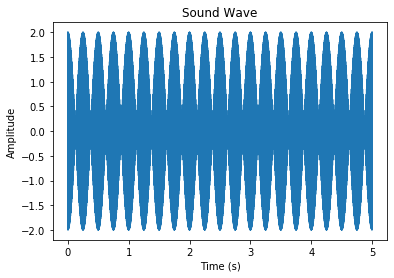

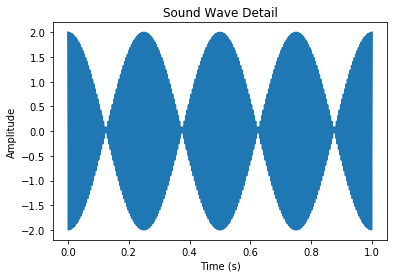

In [3]:
import matplotlib.pyplot as plt

# Show the sound wave
fig, ax = plt.subplots()
ax.plot(t, sound_1)
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Wave')
plt.show()


# We look at the first second
fig, ax = plt.subplots()
tim = np.where(t < 1)
ax.plot(t[tim], sound_1[tim])
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Wave Detail')
plt.show()

The following code plays the sound **data** in **mono**

In [0]:
# Generate a player for mono sound
Audio(sound_1,rate=framerate)

Sound can be played **automatically** after the cell code ends by using the **autoplay** parameter

This is shown on the following example

In [0]:
# Take a 1 second piece of the mono sound
sound_2 = sound_1[0:framerate]

# Generate a player for mono sound
Audio(sound_2,rate=framerate,autoplay=True)

Audio data can also be generated in **stereo**

We will first generate and show the waveforms

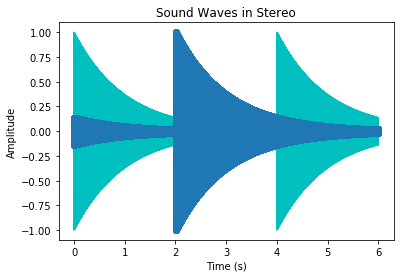

In [0]:
# Base sound
def base(t):
    return np.sin(2*np.pi*220*t)*np.exp(-t)
    
multiplier = 5
framerate = 44100
t = np.linspace(0,6,framerate*multiplier)

tLeft  = 4*(t/4 - np.fix(t/4))
left   = base(tLeft)

tRight = 4*((t+2)/4 - np.fix((t+2)/4))
right  = base(tRight)

# Show stero sound wave
fig, ax = plt.subplots()
ax.plot(t, left, 'c', t, right, 'o')
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Waves in Stereo')
plt.show()


Now we can play the sound data in **stereo**

In [0]:
# Can also be played in stereo or with more channels
Audio([left, right],rate=framerate)

Sound data may also be loaded from **wav** files, but we will focus on generating sounds with data files.

One way to make a file available on internet is using **GitHub**

In [4]:
# Now we are ready to get the weather data!
!wget https://github.com/aenesbitt/stormmaker/raw/master/weather_observations/champaign_weather_history.csv

# And read it in with pandas
raw_data = pd.read_csv('champaign_weather_history.csv', delimiter=',',comment='#', na_values=('M','T'))

--2019-12-12 22:03:38--  https://github.com/aenesbitt/stormmaker/raw/master/weather_observations/champaign_weather_history.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aenesbitt/stormmaker/master/weather_observations/champaign_weather_history.csv [following]
--2019-12-12 22:03:39--  https://raw.githubusercontent.com/aenesbitt/stormmaker/master/weather_observations/champaign_weather_history.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1357960 (1.3M) [text/plain]
Saving to: ‘champaign_weather_history.csv’

champaign_weather_h 100%[===================>]   1.29M  --.-KB/s    in 0.08s   

20

Once the file is saved in the **virtual machine**, it can be read on a numpy array and decoded as sound information

In [0]:
# Our data needs a little bit of processing, and then we can use it to make music!

# Dropping the last column
raw_data = raw_data.drop(columns = 'Unnamed: 6')

# Dropping the NaN values for Trace and Missing data
data = raw_data.dropna()

# Indexing the data with the dates and averaging the precipitation
data.index = pd.to_datetime(data['Date'], format='%Y-%m-%d')


In [8]:
raw_data

,Date,PRCP,SNOW,SNWD,TMAX,TMIN
0,1888-08-17,0.00,NaN,NaN,84.0,64.0
1,1888-08-18,0.00,NaN,NaN,81.0,57.0
2,1888-08-19,0.00,NaN,NaN,85.0,51.0
3,1888-08-20,NaN,NaN,NaN,72.0,62.0
4,1888-08-21,0.10,NaN,NaN,81.0,60.0
...,...,...,...,...,...,...
47952,2019-12-01,0.19,NaN,0.0,46.0,31.0
47953,2019-12-02,0.08,NaN,NaN,34.0,29.0
47954,2019-12-03,0.00,0.0,0.0,40.0,28.0
47955,2019-12-04,0.00,0.0,0.0,49.0,32.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


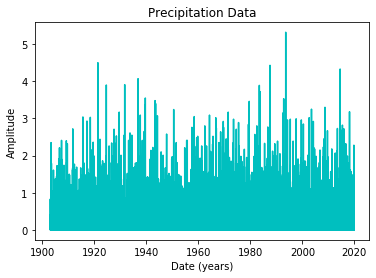

In [6]:
# Show the sound data
fig, ax = plt.subplots()
ax.plot(data.index, data['PRCP'], 'c')
ax.set(xlabel='Date (years)', ylabel='Amplitude',
       title='Precipitation Data')
plt.show()

PRCP    13.82
dtype: float64


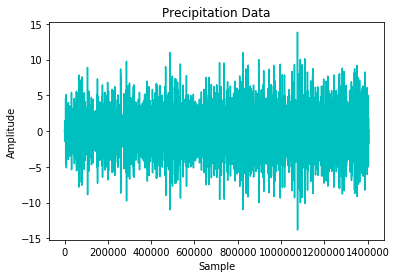

In [7]:
monthly_precip = pd.DataFrame(data['PRCP'].resample('M').sum())
size = np.shape(monthly_precip['PRCP'])
print(monthly_precip.max())
length_factor = 500
precip_sound = np.zeros([1406*2*length_factor])
for i in range(size[0]):
  precip_sound[i*length_factor*2::length_factor] = monthly_precip['PRCP'][i]
  precip_sound[i*length_factor*2 + length_factor::length_factor] = - monthly_precip['PRCP'][i]

# Show the sound data
fig, ax = plt.subplots()
ax.plot(precip_sound, 'c')
ax.set(xlabel='Sample', ylabel='Amplitude',
       title='Precipitation Data')
plt.show()



The loaded sound data can be shown on a graph, if needed

And, of course, it can be played

In [0]:
# Generate a player for mono sound
Audio(precip_sound,rate=44100)

Output hidden; open in https://colab.research.google.com to view.

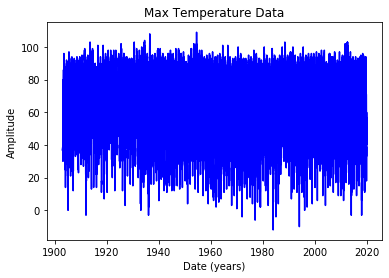

In [9]:
fig, ax = plt.subplots()
ax.plot(data.index, data['TMAX'], 'b')
ax.set(xlabel='Date (years)', ylabel='Amplitude',
       title='Max Temperature Data')
plt.show()

TMAX    2782.0
dtype: float64


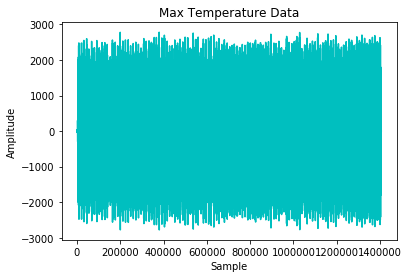

In [10]:
monthly_tmax = pd.DataFrame(data['TMAX'].resample('M').sum())
size = np.shape(monthly_tmax['TMAX'])
print(monthly_tmax.max())
length_factor = 500
temp_sound = np.zeros([1406*2*length_factor])
for i in range(size[0]):
  temp_sound[i*length_factor*2::length_factor] = monthly_tmax['TMAX'][i]
  temp_sound[i*length_factor*2 + length_factor::length_factor] = - monthly_tmax['TMAX'][i]

# Show the sound data
fig, ax = plt.subplots()
ax.plot(temp_sound, 'c')
ax.set(xlabel='Sample', ylabel='Amplitude',
       title='Max Temperature Data')
plt.show()


In [11]:
# Generate a player for mono sound
Audio(temp_sound,rate=44100)

Output hidden; open in https://colab.research.google.com to view.